In [1288]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import statistics
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1289]:
data = pd.read_csv('Credit_Card_Train.csv')
data2 = pd.read_csv('Credit_Card_X_Test.csv')

In [1290]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [1291]:
data.drop("Gender" , axis = 1,inplace=True)
data.drop("Age" , axis = 1,inplace=True)
data.drop("Married" , axis = 1,inplace=True)
data.drop("Ethnicity" , axis = 1,inplace=True)
data.drop("DriversLicense" , axis = 1,inplace=True)
data.drop("ZipCode" , axis = 1,inplace=True)
data.drop("Citizen" , axis = 1,inplace=True)
data.drop("Employed" , axis = 1,inplace=True)
# data.drop("Industry" , axis = 1,inplace=True)
data.drop("BankCustomer" , axis = 1,inplace=True)

In [1292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Debt           483 non-null    float64
 1   Industry       483 non-null    object 
 2   YearsEmployed  483 non-null    float64
 3   PriorDefault   483 non-null    int64  
 4   CreditScore    483 non-null    int64  
 5   Income         483 non-null    int64  
 6   Approved       483 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 26.5+ KB


In [1293]:
data2.drop("id" , axis = 1,inplace=True)
data2.drop("Gender" , axis = 1,inplace=True)
data2.drop("Age" , axis = 1,inplace=True)
data2.drop("Married" , axis = 1,inplace=True)
data2.drop("Ethnicity" , axis = 1,inplace=True)
data2.drop("DriversLicense" , axis = 1,inplace=True)
data2.drop("ZipCode" , axis = 1,inplace=True)
data2.drop("Citizen" , axis = 1,inplace=True)
data2.drop("Employed" , axis = 1,inplace=True)
# data2.drop("Industry" , axis = 1,inplace=True)
data2.drop("BankCustomer" , axis = 1,inplace=True)

In [1294]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Debt           207 non-null    float64
 1   Industry       207 non-null    object 
 2   YearsEmployed  207 non-null    float64
 3   PriorDefault   207 non-null    int64  
 4   CreditScore    207 non-null    int64  
 5   Income         207 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 9.8+ KB


In [1295]:
workIndustry = set(data['Industry'])
workIndustry = list(workIndustry)

for (i,rows) in data.iterrows():
  data.at[i,'Industry'] = workIndustry.index(rows.Industry)
for (i,rows) in data2.iterrows():
  data2.at[i,'Industry'] = workIndustry.index(rows.Industry)

data['Industry'] = data['Industry'].astype(int)
data2['Industry'] = data2['Industry'].astype(int)

In [1296]:
data['Income'] = np.log2(data['Income'])
data2['Income'] = np.log2(data2['Income'])
data.Income.replace(-float('inf'), 0, inplace=True)
data2.Income.replace(-float('inf'), 0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [1297]:
y = data['Approved']
x = data.drop('Approved',axis = 1) 

In [1298]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 1,random_state=3)

In [1299]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix

# classifier = LogisticRegression(penalty='l1',solver='liblinear', C = 3)

In [1300]:
classifier = RandomForestClassifier(n_estimators=100,
                              max_depth=3,
                              min_samples_leaf=1
                              )

In [1301]:
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=3)

In [1302]:
y_predict = classifier.predict(data2)

In [1303]:
pd.DataFrame(y_predict).to_csv('predictied.csv')

In [1304]:
y_predict = classifier.predict(x_test)

In [1305]:
metrics.accuracy_score(y_test, y_predict)

1.0

In [1306]:
feature_imp = pd.Series(classifier.feature_importances_,index = x.columns).sort_values(ascending=False)
feature_imp

PriorDefault     0.498448
CreditScore      0.225621
YearsEmployed    0.131350
Income           0.081497
Debt             0.039888
Industry         0.023197
dtype: float64

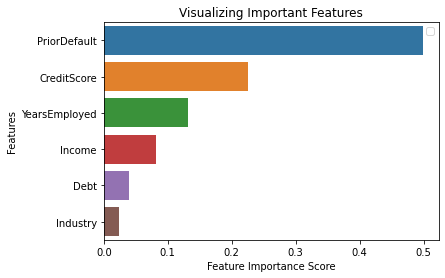

In [1307]:
sns.barplot(x=feature_imp, y= feature_imp.index)
# Add labels to your graph 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()